#### ALGORITHMIC STAFF PROMOTION
We are looking at a model that will observe patterns of promotions and make predition on who is to be Promoted or not

importing libraries that we would be using to Run a successful model 

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

Importing the Data sets

The Train dataset: this has all the date and the promotions over time 

The Test dataset: this is missing the promotions column

In [64]:
train = pd.read_csv('train.csv')

In [65]:
test1 = pd.read_csv('test.csv')

In [66]:
test = pd.read_csv('test.csv')

We would need to need to looking into what the data looks like in but train and test data

In [67]:
train.head(2)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0


In [68]:
test.head(2)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1


We need the to check the total number of columns, numbers of row and missing rows and the type of data each columns has

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        36633 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           16496 non-null  object 
 1   Division                             16496 non-null  object 
 2   Qualification                        15766 non-null  object 
 3   Gender                               16496 non-null  object 
 4   Channel_of_Recruitment               16496 non-null  object 
 5   Trainings_Attended                   16496 non-null  int64  
 6   Year_of_birth                        16496 non-null  int64  
 7   Last_performance_score               16496 non-null  float64
 8   Year_of_recruitment                  16496 non-null  int64  
 9   Targets_met                          16496 non-null  int64  
 10  Previous_Award                       16496 non-null  int64  
 11  Training_score_average      

In [71]:
train.isnull().mean()

EmployeeNo                             0.000000
Division                               0.000000
Qualification                          0.043824
Gender                                 0.000000
Channel_of_Recruitment                 0.000000
Trainings_Attended                     0.000000
Year_of_birth                          0.000000
Last_performance_score                 0.000000
Year_of_recruitment                    0.000000
Targets_met                            0.000000
Previous_Award                         0.000000
Training_score_average                 0.000000
State_Of_Origin                        0.000000
Foreign_schooled                       0.000000
Marital_Status                         0.000000
Past_Disciplinary_Action               0.000000
Previous_IntraDepartmental_Movement    0.000000
No_of_previous_employers               0.000000
Promoted_or_Not                        0.000000
dtype: float64

In [72]:
test.isnull().mean()

EmployeeNo                             0.000000
Division                               0.000000
Qualification                          0.044253
Gender                                 0.000000
Channel_of_Recruitment                 0.000000
Trainings_Attended                     0.000000
Year_of_birth                          0.000000
Last_performance_score                 0.000000
Year_of_recruitment                    0.000000
Targets_met                            0.000000
Previous_Award                         0.000000
Training_score_average                 0.000000
State_Of_Origin                        0.000000
Foreign_schooled                       0.000000
Marital_Status                         0.000000
Past_Disciplinary_Action               0.000000
Previous_IntraDepartmental_Movement    0.000000
No_of_previous_employers               0.000000
dtype: float64

Using Scatter plot and historgram to look at the relation of not promoted and promoted. 0 means not promoted and 1  means promoted

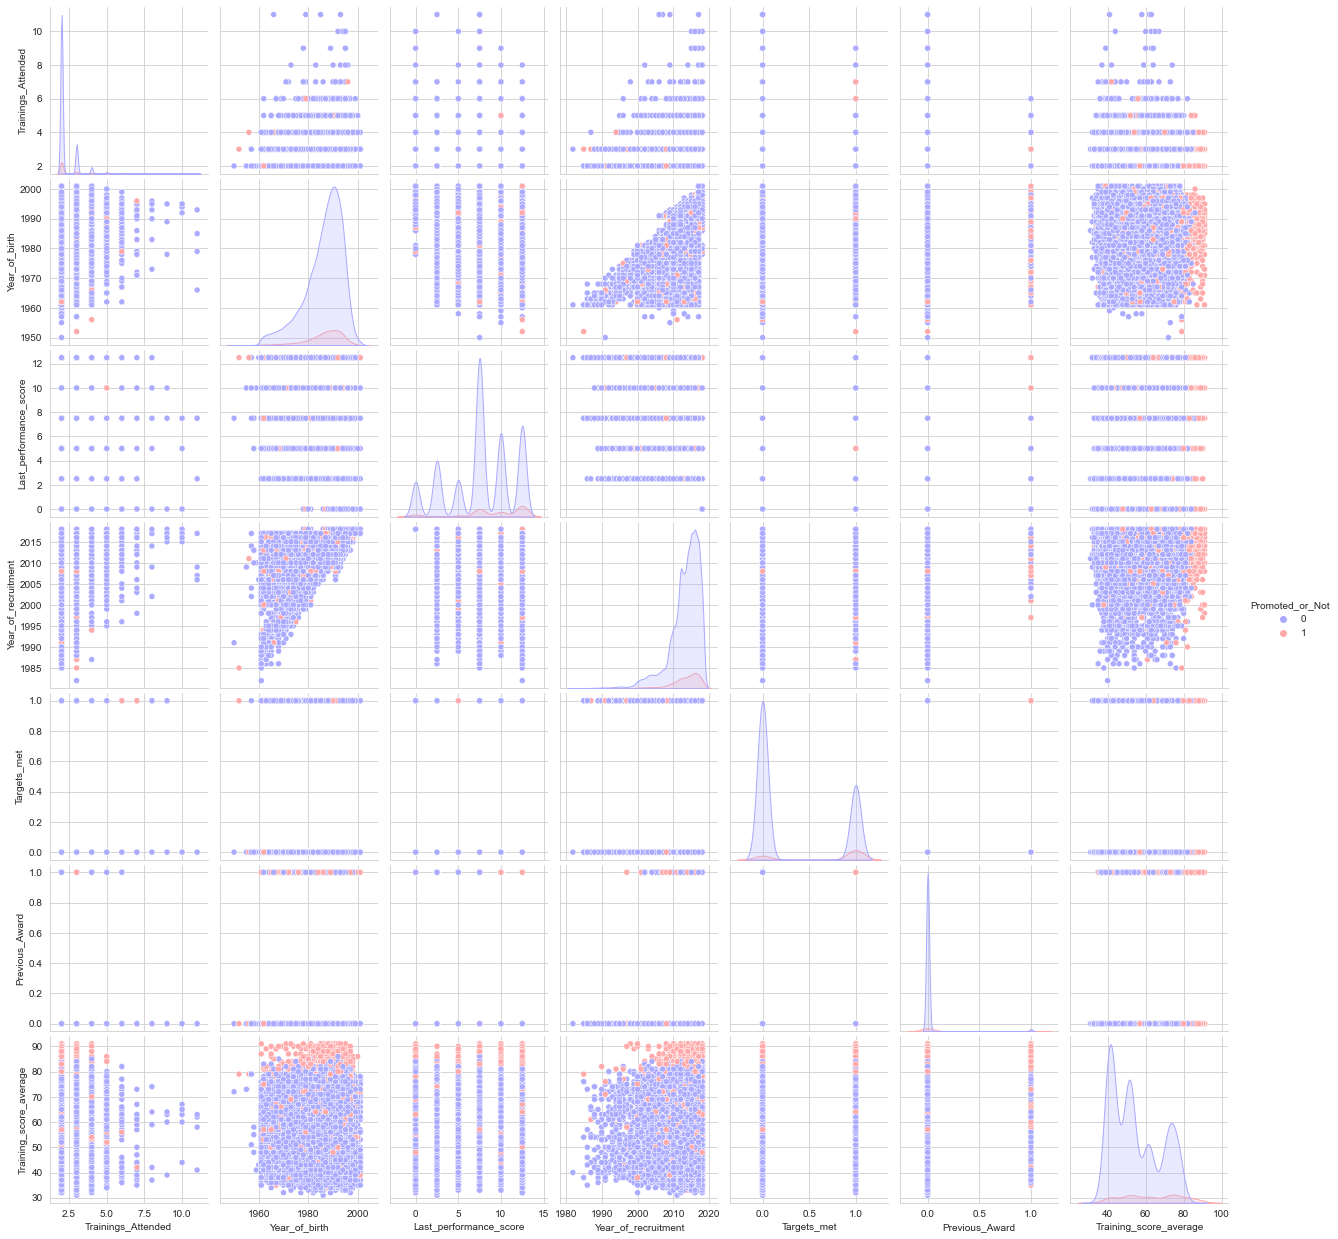

In [73]:
sns.pairplot(train,hue='Promoted_or_Not',palette='bwr')

Using Heat map to check corrolation of all the columns to each other

<AxesSubplot:>

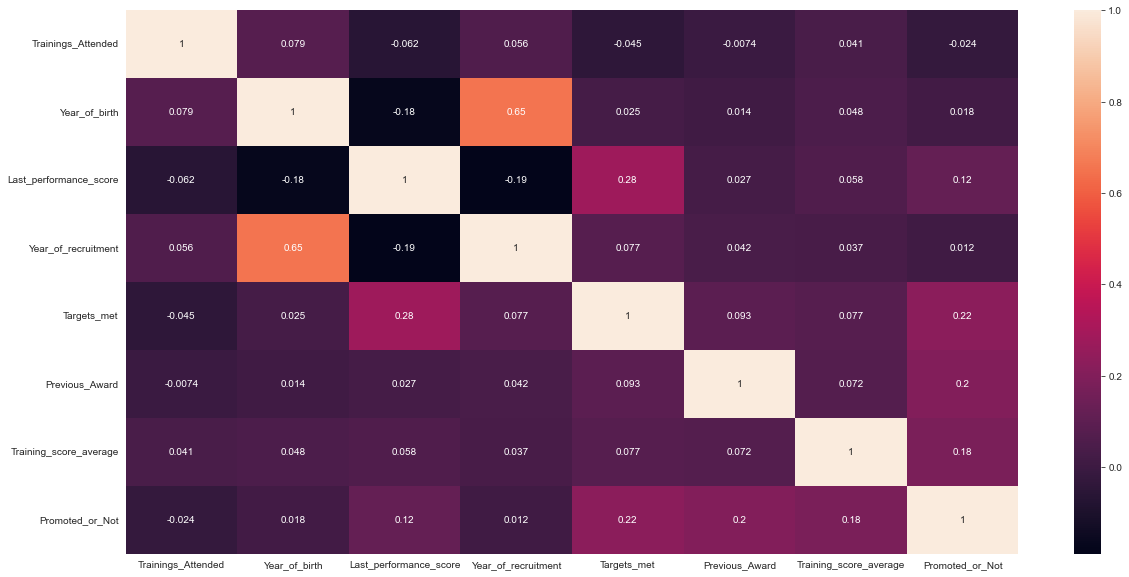

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:>

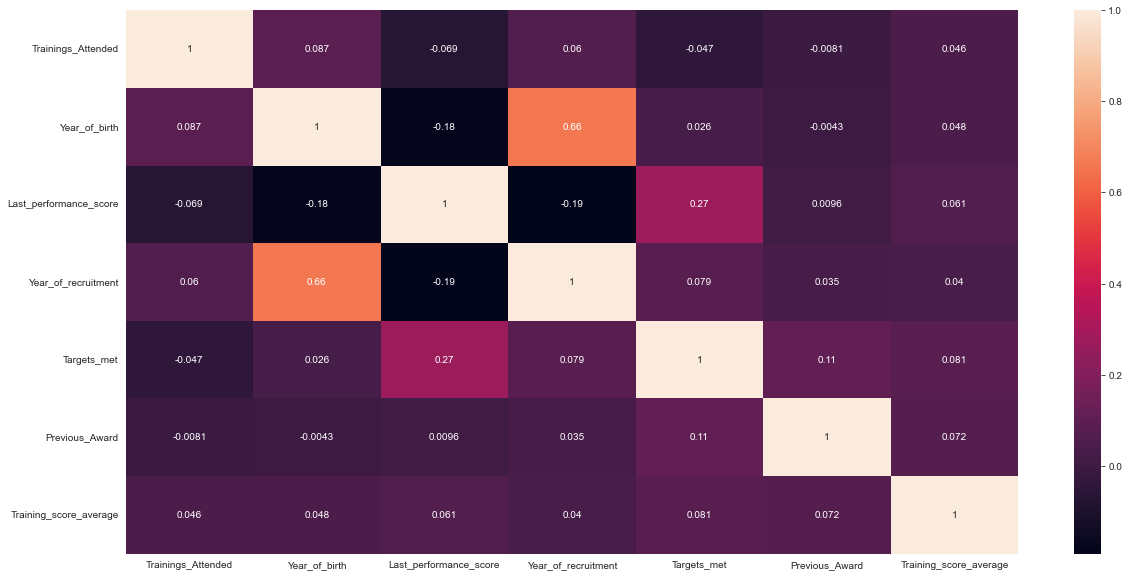

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(test.corr(),annot=True)

from above under data information, we observed that column Qualification is having some missing data, we would using Mode to replace the missing data.

In [76]:
train['Qualification'].mode(0)

0    First Degree or HND
dtype: object

In [77]:
test['Qualification'].mode(0)

0    First Degree or HND
dtype: object

In [78]:
train['Qualification'].value_counts()
train['Qualification'].mode(0)
train['Qualification']=train['Qualification'].fillna(train['Qualification'].mode(0))

In [79]:
test['Qualification'].value_counts()
test['Qualification'].mode(0)
test['Qualification']=train['Qualification'].fillna(train['Qualification'].mode(0))

we need Describe data by looking at the Mean, std min and max

In [80]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Trainings_Attended,38312.0,2.253680,0.609443,2.0,2.0,2.0,2.0,11.0
Year_of_birth,38312.0,1986.209334,7.646047,1950.0,1982.0,1988.0,1992.0,2001.0
Last_performance_score,38312.0,7.698959,3.744135,0.0,5.0,7.5,10.0,12.5
Year_of_recruitment,38312.0,2013.139695,4.261451,1982.0,2012.0,2014.0,2016.0,2018.0
Targets_met,38312.0,0.352996,0.477908,0.0,0.0,0.0,1.0,1.0
Previous_Award,38312.0,0.023152,0.150388,0.0,0.0,0.0,0.0,1.0
Training_score_average,38312.0,55.366465,13.362741,31.0,43.0,52.0,68.0,91.0
Promoted_or_Not,38312.0,0.084595,0.278282,0.0,0.0,0.0,0.0,1.0


In [81]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Trainings_Attended,16496.0,2.251455,0.608865,2.0,2.0,2.0,2.0,11.0
Year_of_birth,16496.0,1986.161130,7.708188,1958.0,1982.0,1988.0,1992.0,2001.0
Last_performance_score,16496.0,7.692016,3.734303,0.0,5.0,7.5,10.0,12.5
Year_of_recruitment,16496.0,2013.122393,4.273649,1986.0,2011.0,2014.0,2016.0,2018.0
Targets_met,16496.0,0.349600,0.476858,0.0,0.0,0.0,1.0,1.0
Previous_Award,16496.0,0.023218,0.150599,0.0,0.0,0.0,0.0,1.0
Training_score_average,16496.0,55.433863,13.392306,31.0,43.0,52.0,68.0,91.0


No_of_previous_employers is having a categorical data in it cell making it be views as object but we need float

Encoding columns with just varibles with 0 and 1

In [82]:
train['Gender'] = train['Gender'].replace('Male', 0)
train['Gender'] = train['Gender'].replace('Female', 1)

In [83]:
test['Gender'] = test['Gender'].replace('Male', 0)
test['Gender'] = test['Gender'].replace('Female', 1)

In [84]:
train['Foreign_schooled'] = train['Foreign_schooled'].replace('Yes', 0)
train['Foreign_schooled'] = train['Foreign_schooled'].replace('No', 1)

In [85]:
test['Foreign_schooled'] = test['Foreign_schooled'].replace('Yes', 0)
test['Foreign_schooled'] = test['Foreign_schooled'].replace('No', 1)

In [86]:
test['Past_Disciplinary_Action'] = test['Past_Disciplinary_Action'].replace('Yes', 0)
test['Past_Disciplinary_Action'] = test['Past_Disciplinary_Action'].replace('No', 1)

In [87]:
train['Past_Disciplinary_Action'] = train['Past_Disciplinary_Action'].replace('Yes', 0)
train['Past_Disciplinary_Action'] = train['Past_Disciplinary_Action'].replace('No', 1)

In [88]:
train['Previous_IntraDepartmental_Movement'] = train['Previous_IntraDepartmental_Movement'].replace('Yes', 0)
train['Previous_IntraDepartmental_Movement'] = train['Previous_IntraDepartmental_Movement'].replace('No', 1)

In [89]:
test['Previous_IntraDepartmental_Movement'] = test['Previous_IntraDepartmental_Movement'].replace('Yes', 0)
test['Previous_IntraDepartmental_Movement'] = test['Previous_IntraDepartmental_Movement'].replace('No', 1)

Dummy Encoding is used we the the data set is more than 2 variables 

In [90]:
train = pd.get_dummies(train, columns=['Qualification'], drop_first=True)

In [91]:
test = pd.get_dummies(test, columns=['Qualification'], drop_first=True)

In [92]:
test = pd.get_dummies(test, columns=['Division'], drop_first=True)

In [93]:
train = pd.get_dummies(train, columns=['Division'], drop_first=True)

In [94]:
train = pd.get_dummies(train, columns=['Channel_of_Recruitment'], drop_first=True)

In [95]:
test = pd.get_dummies(test, columns=['Channel_of_Recruitment'], drop_first=True)

In [96]:
train = pd.get_dummies(train, columns=['Marital_Status'], drop_first=True)

In [97]:
test = pd.get_dummies(test, columns=['Marital_Status'], drop_first=True)

In [98]:
train = pd.get_dummies(train, columns=['No_of_previous_employers'], drop_first=True)

In [99]:
test = pd.get_dummies(test, columns=['No_of_previous_employers'], drop_first=True)

Looking at what the new data looks like after encoding

In [100]:
train.head()

,EmployeeNo,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,...,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Marital_Status_Not_Sure,Marital_Status_Single,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,YAK/S/00001,1,2,1986,12.5,2011,1,0,41,ANAMBRA,...,1,0,0,0,0,0,0,0,0,0
1,YAK/S/00002,0,2,1991,12.5,2015,0,0,52,ANAMBRA,...,0,0,0,0,0,0,0,0,0,0
2,YAK/S/00003,0,2,1987,7.5,2012,0,0,42,KATSINA,...,1,0,0,0,0,0,0,0,0,0
3,YAK/S/00004,0,3,1982,2.5,2009,0,0,42,NIGER,...,0,0,0,1,1,0,0,0,0,0
4,YAK/S/00006,0,3,1990,7.5,2012,0,0,77,AKWA IBOM,...,1,0,0,0,1,0,0,0,0,0


Noting the data types and the one to convert from object to Integer or Float

In [101]:
train.dtypes

EmployeeNo                                                 object
Gender                                                      int64
Trainings_Attended                                          int64
Year_of_birth                                               int64
Last_performance_score                                    float64
Year_of_recruitment                                         int64
Targets_met                                                 int64
Previous_Award                                              int64
Training_score_average                                      int64
State_Of_Origin                                            object
Foreign_schooled                                            int64
Past_Disciplinary_Action                                    int64
Previous_IntraDepartmental_Movement                         int64
Promoted_or_Not                                             int64
Qualification_MSc, MBA and PhD                              uint8
Qualificat

We would be removing some of the columnes that does not have impact on predicting the outcome

In [102]:
test.drop(['EmployeeNo','State_Of_Origin',], axis=1, inplace=True)

In [103]:
train.drop(['EmployeeNo','State_Of_Origin',], axis=1, inplace=True)

Test1 is need to compare prediction result to Employee id

In [104]:
EmployeeNo= test1['EmployeeNo']

Setting our varaibles and Outcome for Sklearn 

In [105]:
X = train.drop('Promoted_or_Not', axis=1)

y = train['Promoted_or_Not']

standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

The Sklearn train_test_split function helps us create our training data and test data. This is because typically, the training data and test data come from the same original dataset.

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [109]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30649, 31)
(7663, 31)
(30649,)
(7663,)


In [110]:
X_train.head()

,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,...,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Marital_Status_Not_Sure,Marital_Status_Single,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
17862,0,2,1977,7.5,2007,0,0,42,0,1,...,1,0,0,1,1,0,0,0,0,0
8086,0,2,1994,12.5,2017,0,0,40,0,1,...,0,0,0,0,1,0,0,0,0,0
2314,0,2,1968,10.0,2009,0,0,50,0,1,...,1,0,0,1,1,0,0,0,0,0
861,0,2,1997,0.0,2018,0,0,53,0,1,...,1,0,0,0,1,0,0,0,0,0
12410,0,2,1988,7.5,2015,0,0,59,0,1,...,1,0,0,0,0,0,0,0,0,0


In [111]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

We would be using Logistic Regresstion to make prediction

In [112]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [113]:
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [114]:
y_pred=lr.predict(X_test_scaled)

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Checking the accuracy of the model

In [116]:
print(accuracy_score(y_test, y_pred))

0.933576928096046


In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7052
           1       0.77      0.24      0.37       611

    accuracy                           0.93      7663
   macro avg       0.85      0.62      0.67      7663
weighted avg       0.92      0.93      0.92      7663



In [118]:
print(confusion_matrix(y_test, y_pred))

[[7007   45]
 [ 464  147]]


In [119]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Testing the model with new data  it has not seen before

In [120]:
test_prediction=lr.predict(test)

In [121]:
test_prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Generating result to be use

In [122]:
Final_sec= pd.DataFrame({'EmployeeNo':EmployeeNo,'Promoted_or_Not':test_prediction}) 

In [123]:
Final_sec.head(5)

,EmployeeNo,Promoted_or_Not
0,YAK/S/00005,1
1,YAK/S/00011,1
2,YAK/S/00015,1
3,YAK/S/00016,1
4,YAK/S/00017,1


Final.to_csv('Final.csv', index = False)

Exporting the prediction to CSV file for everluation

In [124]:
Final_sec.to_csv('Final_sec.csv')